# Brief introduction to MCMC

## Monte Carlo integration

Let $X$ be a vector of $k$ random variables, with distribution $\pi(x)$. In Bayesian applications, $X$ will comprise model parameters and missing data and $\pi(x)$ will be a posterior distribution. For frequentists, $X$ may comprise data or random effects and $\pi(x)$ will be a likelihood. Either way, the task is to evaluate the expectation

$$
    E[f(X)] = \frac{\int f(x) \pi(x) dx}{\int \pi(x) dx}
$$

for some function of interest $f(x)$. Monte Carlo integration evaluates $E[f(X)]$ by drawing samples $\{X_t,t=1,...,n\}$ from $\pi(x)$ and then approximating

$$
    E[f(X)] \approx \frac{1}{n} \sum_{t=1}^n f(X_t),
$$

so the population mean of $f(X)$ is estimated by a sample mean. When the samples $\{X_t\}$ are independent, the law of large numbers ensures that the approximation can be made as accurate as desired by increasing the sample size $n$.

In general, drawing samples $\{X_t\}$ independently from $\pi(x)$ is not feasible, since $\pi(x)$ can be quite non-standard. However the $\{X_t\}$ need not necessarily to be independent. The $\{X_t\}$ can be generated by any process which, loosely speaking, draws samples throughout the support of $\pi(x)$ in the correct proportions. One way of doing this is through a Markov chain having $\pi(x)$ as its stationary distribution. This is then Markov Chain Monte Carlo (MCMC).

## Markov chain

Suppose we generate a sequence of random variables, $\{X_0,X_1,X_2,...\}$, such that at each time $t \geq 0$, the next state $X_{t+1}$ is sampled from a distribution $P(X_{t+1}|X_t)$ which depends only on the current state of the chain, $X_t$. That is, given $X_t$, the next state $X_{t+1}$ does not depend further on the history of the chain $\{X_0,X_1,X_2,...\}$. This sequence is called a Markov chain, and $P(X_{t+1}|X_t)$ is called the *transition kernel* of the chain.

How does the starting state $X_0$ affect $X_t$? This question concerns the distribution of $X_t$ given $X_0$, which we denote $P^{(t)} (X_t|X_0)$. Here we are not given the intervening variables $\{X_1,X_2,...,X_{t-1}\}$, so $X_t$ depends directly on $X_0$. Subject to regularity conditions, the chain will gradually forget its initial state and $P^{(t)} (X_t|X_0)$ will eventually converge to a unique *stationary distribution*, which does not depend on $t$ or $X_0$.

The regularity conditions that the Markov chain must satisfy to converge to  stationary distribution are:



- Irreducibility: from all starting points, the Markov chain must be able (eventually) to jump to all states in the target distribution with positive probability, in some number of iterations;
- Aperiodicity: this stops the chain from oscillating between different states in a regular periodic movement;
- Positive recurrency: this can be expressed in terms of a stationary distribution $\phi(X)$, say, such that if an initial value $X_0$ is sampled from $\phi(X)$, then all subsequent iterates will also be distributed according to $\phi(X)$.


The point now should be choosing an appropriate transition kernel that ensures the target distribution (the posterior) will be the stationary distribution. This seems to be complicate, but can be simplified by the following considerations. If we have a transition kernel that satisfies the *detailed balance equation*

$$
    \pi(X_t) P(X_{t+1}|X_t) = \pi(X_{t+1}) P(X_t|X_{t+1}),
$$

where $\pi(X)$ is our target distribution (posterior) we get, by integrating,

$$
    \int \pi(X_t) P(X_{t+1}|X_t) dX_t = \pi(X_{t+1}).
$$

The lhs of this equation gives the marginal distribution of $X_{t+1}$ under the assumption that $X_t$ is from $\pi(X)$. The rhs says that if $X_t$ is from $\pi(X)$, then $X_{t+1}$ will be as well, i.e. we have reached the stationary distribution. This means that if we construct a transition kernel such that the detailed balance equation is satisfied with the variable $X$ being generated by our target distribution, the stationary distribution will be our target distribution.

Thus, after a sufficiently long *burn-in* of $m$ iterations, points $\{ X_t; t=m+1,...,n \}$ will be dependent samples approximately from stationary distribution (the target distribution in our case). We can now use the output from the Markov chain to estimate the expectation $E[f(X)]$, where $X$ has distribution $\pi(X)$. Burn-in samples are usually discarded for this calculation, and the estimator is

$$
    \overline{f} = \frac{1}{n-m} \sum_{t=m+1}^n f(X_t).
$$

This is called an *ergodic average*. Convergence to the required expectation is ensured by the ergodic theorem.

## Metropolis-Hastings algorithm

A simple method of computing MCMC is the Metropolis-Hastings (MH) algorithm. At each time $t$, the next state $X_{t+1}$ is chosen by first sampling a *candidate* point $Y$ from a *proposal* distribution $q(.|X_t)$. Note that the proposal distribution may depend on the current point $X_t$. The candidate point is then accepted with probability $\alpha(X_t,Y)$ where

$$
    \alpha(X,Y) = \min \left( 1, \frac{\pi(Y) q(X|Y)}{\pi(X) q(Y|X)} \right).
$$

If the candidate point is accepted, the next state becomes $X_{t+1}=Y$, otherwise the chain does not move, i.e. $X_{t+1}=X_t$. The algorithm can be simply written:

- Initialize $X_0$; set $t=0$;
- Repeat{
    - Sample a point $Y$ from $q(Y|X_t)$;
    - Sample a Uniform(0,1) random variable $U$;
    - If $U \leq \alpha(X_t,Y)$
        - set $X_{t+1}=Y$
    - Else
        - set $X_{t+1}=X_t$
    - Increment $t$ }.

# Bayesian inference and the Neutron Star Equation of State

Since their discovery more than 50 years ago, neutron stars (NSs) have attracted much attention because of their extreme physical properties. Such interest has been highly boosted recently by the direct detection of gravitational waves (GWs) from the NS merger GW170817 and its electromagnetic counterparts GRB170817A and AT2017gfo which imposed a new set of observational constrains on some key properties of these objects. We count not only with GWs, but also with the electromagnetic (EM) band to give us astrophysical data. Besides all the radio measurements of pulsars done in the last decades, the NICER mission has already provided very important constraints for the NS radius and mass with the X-ray pulse profiling technique.

NSs are objects of mass $1-2 M_\odot$ and radius $\sim 10 km$ and central densities that can reach up to $10 \rho_{sat}$, where $\rho_{sat} = 2.7 \times 10^{14} g \, cm^{-3}$ is the nuclear saturation density. It is known that NSs contain matter under extreme conditions, but the exact nature of their deep interiors, i.e. their Equation of State (EOS), is still an open question. Among the quantities we can measure, the mass and radius are the most important ones as they could give direct information on the EOS. The mass can be measured with significant precision ($\sim$1% at the 68% level) but the radius is harder (5-10% at the 68% level) due to the small size of the stars. Therefore, constructing a solid statistical framework that would help to combine all available data is fundamental to resolve the EOS. In this sense, Bayesian inference has proven to be the most robust way of analyzing multissenger data and solving the so-called relativistic inverse stellar structure problem.


A lot of parametric and non-parametric EOS models have been considered when performing Bayesian inference. The parametric models have the advantage of being simpler but are more general, so the non-parametric ones can give us direct information on specific microscopic quantities. In order to exemplify how one could use MCMC and Bayesian inference to analyze NS data, we perform a study on the composition of white dwarfs (WDs), another class of compact stars sharing some of the ideas of NSs. The physical introduction for WDs follows in the next section.

<img src="imagejupyter.png">


## Stellar structure of White Dwarfs

White dwarfs are stars of about one solar mass with characteristic radii of about 5000 km and mean densities of around $10^6 \mathrm{g \, cm^{-3}}$. These stars no longer burn nuclear fuel, and they are the final stage of not so massive stars. They are slowly cooling as they radiate away their residual thermal energy. We know today that white dwarfs support themselves against gravity by the pressure of degenerate electrons.

The structure of WDs are dictated by the conditions of hydrostatic equilibrium. In the case of considering general relativistic effects, we would write the Tolman-Oppenheimer-Volkov equations,but WDs can be well described within the Newtonian framework. The Newtonian hydrostatic equilibrium equations for a spherically symmetric distribution of matter are written as

$$
    \frac{dm(r)}{dr} = 4 \pi r^2 \rho, \\
    \frac{dP(r)}{dr} = -\frac{G m(r) \rho}{r^2},
$$

where $\rho$ is the rest-mass density (as we are considering non-relativistic effects for matter), $m(r)$ is the mass contained within the radius $r$, $P$ is the radial dependent pressure and $G$ is the gravitational constant. To close this system of equations, one must have the EOS that connects $P$ to $\rho$. The EOS of the fully degenerate electron gas takes a particularly simple form in the nonrelativistic limit, as well as in the extreme relativistic limit. For the first one, it is $P \propto \rho^{5/3}$, while for the second it is $P \propto \rho^{4/3}$. Based on that, we can define a general EOS of WDs as a *polytrope*, i.e. it follows a relation $P=K \rho^\Gamma$, where $K$ and $\Gamma$ are constants. Using that, we can compute the intermediate regime and as a second step add corrections to this model.

To solve this system of equations, we numerically integrate from the center of the star (where $r=0$, $m=0$, $\rho=\rho_c$ and $P=P_c$) to the surface (where $r=R$, $m=M$, $\rho=0$ and $P=0$). So, as input we take a value of $\rho_c$ or $P_c$ and integrate until we reach $P=0$.

### Lane-Emden equation

The calculation of the stellar structure can be simplified as we have a polytropic EOS. Conveniently defining $\Gamma = 1 + 1/n$, where $n$ is called the polytropic index, we redefine the variables as

$$
    \rho = \rho_c \theta^n, \\
    r = a \xi, \\
    a = \left( \frac{(n+1) K \rho_c^{1/n-1}}{4 \pi G} \right)^{1/2},
$$

so we can rewrite the stellar structure equations as the Lane-Emden equation

$$
    \frac{1}{\xi^2} \frac{d}{d \xi} \xi^2 \frac{d\theta}{d\xi} = -\theta^n.
$$

The boundary conditions are $\theta(0)=0$, $\theta'(0)=0$ and $\theta(\xi_1)=0$, where $\xi_1$ is associated to $r=R$. In function of $\xi_1$, we get the results

$$
    R = a \xi_1 = \left[ \frac{(n+1) K}{4 \pi G} \right]^{1/2} \rho_c^{(1-n)/2n} \xi_1, \\
    M = 4 \pi \left[ \frac{(n+1) K}{4 \pi G} \right]^{3/2} \rho_c^{(3-n)/2n} \xi_1^2 |\theta'(\xi_1)|,
$$

and so

$$
    M = 4 \pi R^{(3-n)/(1-n)} \left[ \frac{(n+1) K}{4 \pi G} \right]^{n/(n-1)} \xi_1^{\frac{n+1}{n-1}} |\theta'(\xi_1)|.
$$

Therefore, if we a priori know the mass or the radius, we can determine the other one without the need for the central pressure.

## How to connect the macroscopic observables to EOS parameters within Bayesian inference?

The goal of Bayesian inference is to find the *posterior* distribution of a certain parameters given a *likelihood* and a *prior* distribution. In mathematical terms, we can represent this as

$$
    P(\Theta|D) = \frac{P(\Theta) P(D|\Theta)}{\int P(\Theta) P(D|\Theta) d\Theta},
$$

where $\Theta$ represents the set of parameters we want to estimate and $D$ the data we have available. $P(\Theta)$ is the prior distribution of the parameters, i.e. our previous knowledge before evaluating the likelihood to impose constraints. $P(D|\Theta)$ is the likelihood function and gives the probability of the data to be fit given fixed parameters. $P(\Theta|D)$ is the posterior distribution and represents our updated knowledge with respect to the prior after using the likelihood. The denominator of the expression is called *evidence* and for purposes of parameters estimation it is only a normalization constant; for model selection, it must be evaluated. Our goal here with MCMC is sampling the posterior distribution so we can perform parameter estimation of our EOS.

For our polytropic EOS, we have $\Theta = \{K,n\}$ and the data will be measurements of the star's mass and radius. The likelihood therefore will involve $M$ and $R$. In a detection of an NS event, the paper provides the table that we can use to construct an interpolated likelihood, however here we assume that for the mass and radius the likelihood has a Gaussian form given by (note we write the logarithm of the likelihood)

$$
    \ln\,p(M_{obs}, R_{obs} |n, K) =
    -\frac{1}{2} \sum_i^{N_{obs}} \left[
        \frac{(R_{obs_i}-R)^2}{\sigma_{R_i}^2} +
        \frac{(M_{obs_i}-M)^2}{\sigma_{M_i}^2} + 
        \ln ( 2 \pi \sigma_{R_i}^2 ) + \ln ( 2 \pi \sigma_{M_i}^2 )
    \right]
$$

where the $N_{obs}$ is the number of observations and the $\sigma$ will be the uncertainty of the measurements. Now comes a key point for the solution of the problem: we are sampling in $n$ and $K$ but we need $M$ and $R$, so we need to solve the stellar structure equations every iteration to evaluate the likelihood; that's the most time consuming part of the code.

We are almost ready to go, there are only some details. When we consider both the mass and radius as variables, we still need to solve the stellar structure equation for a given $\rho_c$ (or $P_c$), so we must sample $\rho_c$ for every observed star considered as well. So, in practice, besides sampling for $n$ and $K$ we need to add a dimension correspondent to the parameter $\rho_c$ for every star.

Finally, there is one last comment. Our final goal is to estimate the values of $n$ and $K$, and consequently $\rho_c$ (or $P_c$). So, for one observed star, we have 3 parameters to estimate and only 2 observables ($M$ and $R$). If we want to fully characterize our EOS through Bayesian inference, we need to have at least the same number of observables as the number of parameters being sampled to close the system. Thus, in our case we need at least 2 observed stars so we have 4 parameters ($n$, $K$, $\rho_{c1}$ and $\rho_{c2}$) and 4 observables ($M_1$, $R_1$, $M_2$, $R_2$).

Now we can calculate our results. The situation with the Lane-Emden equation will be left for the final.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%config InlineBackend.figure_format = "retina"

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

## Definition of Runge-Kutta method and stellar structure equations

In [2]:
def dydx1(r, m, p, n, kappa):
    Gamma=1+1/n
    rho=(p/kappa)**(1/Gamma)
    return 4*np.pi*(r**2)*rho

def dydx2(r, m, p, n, kappa):
    Gamma=1+1/n
    rho=(p/kappa)**(1/Gamma)
    G=6.67430E-8
    return -G*m*rho/(r**2)

In [3]:
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(r0, m0, p0, h, n_index, K):

    # Initialise variables
    m = m0
    p = p0
    
   # while p>1.0E14:
    while p/p0>1.0E-8:
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h*dydx1(r0, m, p, n_index, K)
        l1 = h*dydx2(r0, m, p, n_index, K)
        k2 = h*dydx1(r0 + 0.5 * h, m + 0.5 * k1, p + 0.5 * l1, n_index, K)
        l2 = h*dydx2(r0 + 0.5 * h, m + 0.5 * k1, p + 0.5 * l1, n_index, K)
        k3 = h*dydx1(r0 + 0.5 * h, m + 0.5 * k2, p + 0.5 * l2, n_index, K)
        l3 = h*dydx2(r0 + 0.5 * h, m + 0.5 * k2, p + 0.5 * l2, n_index, K)
        k4 = h*dydx1(r0 + h, m + k3, p + l3, n_index, K)
        l4 = h*dydx2(r0 + h, m + k3, p + l3, n_index, K)
       # print(m,k4,p,l4,n_index)
 
        # Update next value of m and p
        m = m + (1.0/ 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        p = p + (1.0/ 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)
 
        # Update next value of x
        r0 = r0 + h
        r=r0
        #print(r,m,p)
        
    return r,m

In [4]:
def LaneEmden(n_index,logK,logrhoa,logrhob):   #logP cgs, mass Msun
    
    r0 = 1.0E2           #initial point of integration in cm
    
    rho = np.array([10**logrhoa,10**logrhob]) #density in g/cm^3
    #p = np.array([10**logPa,10**logPb])  #pressure in dyn/cm2
    #p = p/(1.6022E33)    #pressure in MeV/fm3
    #p = p*1.3234E-6    #pressure in geometrized units
    K = 10**logK
    Gamma=1+1/n_index
    p = K*rho**Gamma

    
    G = 6.67430E-8   #gravitational constant in cgs units
    
    m = 4*np.pi*rho*(r0**3)/3                     #expansion for m(r) in cgs
    p = p + 0.5*(-4*np.pi*G*(rho**2)/3)           #expansion for p(r) in cgs
    h = 1.0E5            #step of integration = 100000 cm
    
    
    radius_a, mass_a = rungeKutta(r0, m[0], p[0], h, n_index, K)
    radius_b, mass_b = rungeKutta(r0, m[1], p[1], h, n_index, K)
    
    mass_a = mass_a/1.989E33  #conversion from g to Msun
    mass_b = mass_b/1.989E33
    radius_a = radius_a/1.0E5 #conversion from cm to km
    radius_b = radius_b/1.0E5
    
    return mass_a,mass_b,radius_a,radius_b

## Data

Here we write the observed data for two observed WDs:
- Sirius B: $M=(1.000 \pm 0.016)M_\odot$, $R=(0.0084 \pm 0.0002)R_\odot$
- 40 Eri B: $M=(0.501 \pm 0.011)M_\odot$, $R=(0.0136 \pm 0.0002)R_\odot$

In [5]:
N_obs=2
xv = np.array([1.0,0.501]) #observed mass in solar masses
yv = np.array([0.0084*696340,0.0136*696340]) #observed radius in km
sigma_x = np.array([0.016,0.011])
sigma_y = np.array([0.0002*696340,0.0002*696340])

## Likelihood


As mentioned before, our likelihood is:

$$
    \ln\,p(M_{obs}, R_{obs} |n, K, \rho_{c_i}, ..., \rho_{c_{N_{obs}}}) =
    -\frac{1}{2} \sum_i^{N_{obs}} \left[
        \frac{(R_{obs_i}-R)^2}{\sigma_{R_i}^2} +
        \frac{(M_{obs_i}-M)^2}{\sigma_{M_i}^2} + 
        \ln ( 2 \pi \sigma_{R_i}^2 ) + \ln ( 2 \pi \sigma_{M_i}^2 )
    \right]
$$

Note that we will sample in $\log_{10}(K)$, $\log_{10}(\rho_{c1})$ and $\log_{10}(\rho_{c2})$.

In [6]:
def log_likelihood(theta, xv, yv):
    
    n_index, logK, logrhoa, logrhob = theta
    ma,mb,ra,rb = LaneEmden(n_index,logK,logrhoa,logrhob)
    sigma2x = sigma_x ** 2
    sigma2y = sigma_y ** 2
    return -0.5 * ((xv[0] - ma) ** 2 / sigma2x[0] + (xv[1] - mb) ** 2 / sigma2x[1] + (yv[0] - ra) ** 2 / sigma2y[0] + (yv[1] - rb) ** 2 / sigma2y[1] + np.log((sigma2x[0]**2)*(sigma2x[1]**2)*(sigma2y[0]**2)*(sigma2y[1]**2)*(2*np.pi)**4))

## Priors

For $n$, $\log_{10}(K)$, $\log_{10}(\rho_{c1})$ and $\log_{10}(\rho_{c2})$ we will assume uniform priors in the range specified below.

In [7]:
def log_prior(theta):
    n_index, logK, logrhoa, logrhob = theta
    if (1.0 < n_index < 3.0 and 11.2 < logK < 15.0 and 5 < logrhoa < 9 and 5 < logrhob < 9):
        return np.log((1/2)*(1/3.8)*(1/4)*(1/4))
    else:
        return -np.inf #log(0)

## Posterior

So finally for our posterior, always working with logarithms, we have:

In [8]:
def log_posterior(theta, xv, yv):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + log_likelihood(theta, xv, yv)

To sample this distribution, we will use the *emcee* library assuming the default stretch move instead of Metropolis-Hastings.

We run our calculation with 32 walkers and 10000 steps. Our initial point will be located at an expected place, being slightly different for each walker.

Moreover, we will parallelize the algorithm through the multiprocessing library. This is the standard recommended by the *emcee* documentation.

In [9]:
import emcee

#trial = np.array([1.8,13,7,7]) #worked with priors 1.0 < n_index < 3.0 and 12.0 < logK < 15.0 and 5 < logrhoa < 9 and 5 < logrhob < 9
trial = np.array([1.45,12.1,7.1,6.7])
pos = trial + 1e-1 * np.random.randn(32, 4)

nwalkers, ndim = pos.shape
nsteps=10000

In [1]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

16 CPUs


In [11]:
#Parallel run
from multiprocessing import Pool
import time

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(xv, yv), pool=pool)
    start = time.time()
    sampler.run_mcmc(pos, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))

100%|██████████| 10000/10000 [4:20:02<00:00,  1.56s/it] 

Multiprocessing took 15603.8 seconds


The samples can be accessed using the :func:`EnsembleSampler.get_chain` method.
This will return an array
with the shape `(nsteps, nwalkers, # parameters)` giving the parameter values for each walker
at each step in the chain.
The figure below shows the positions of each walker as a function of the
number of steps in the chain:

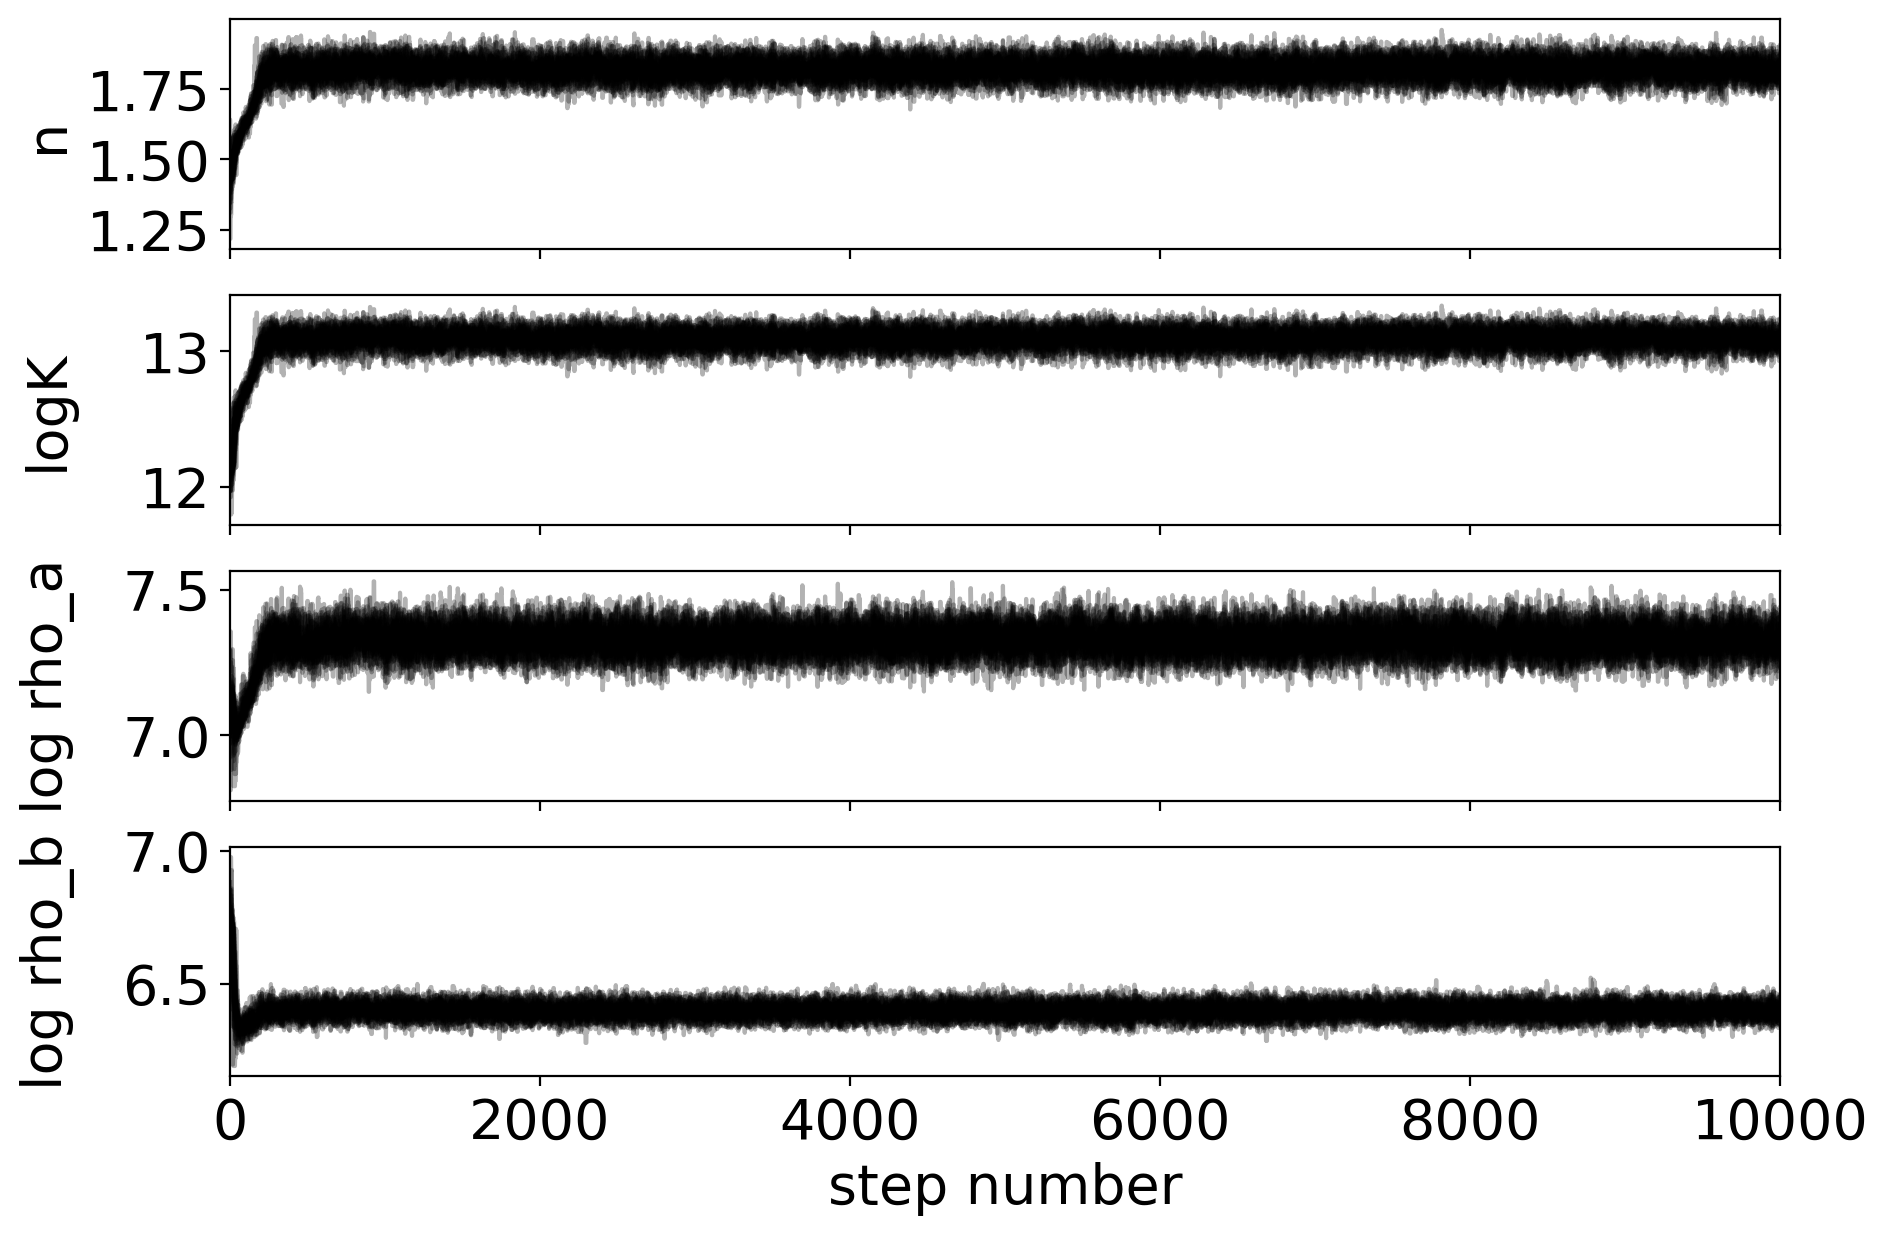

In [12]:
fig, axes = plt.subplots(4, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["n", "logK", "log rho_a", "log rho_b"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

To determine the burn-in number of steps, we will look at the above plot and estimate it. Note that we need a long enough chain in order to avoid significant effects of cutting out the first part of the chain.

Here we will also flatten the samples, i.e. we will merge all the chains into one.

In [18]:
flat_samples = sampler.get_chain(discard=800, flat=True)
print(flat_samples.shape)

(294400, 4)


An interesting quantity to measure the efficiency of our chain is the autocorrelation time. It basically measures after how many steps the sampled quantity get independent from its previous history. So, for example, in our situation at every approximately 100 step there is one independent. Note that we must run a long wnough chain again to ensure a reasonable level of independence.

In [19]:
tau = sampler.get_autocorr_time()
print(tau)

[108.95389657 112.96858931  98.75152814  38.58151416]


Here we write the samples to a file.

In [20]:
from tabulate import tabulate

with open('flatsamplesWD_pc.txt', 'w') as f:
    f.write(tabulate(flat_samples,headers=["n","logK","log rho_a","log rho_b"],floatfmt=".8f"))

In [55]:
flat_samples

array([[ 1.77121253, 12.9887069 ],
       [ 1.69844844, 12.84295502],
       [ 1.80090014, 13.04875159],
       ...,
       [ 1.84300398, 13.12337459],
       [ 1.82056026, 13.09128109],
       [ 1.80455917, 13.06096766]])

## Results

Now that we have this list of samples, let's make one of the most useful plots
you can make with your MCMC results: *a corner plot*.
You'll need the [corner.py module](http://corner.readthedocs.io) but
once you have it, generating a corner plot is as simple as:

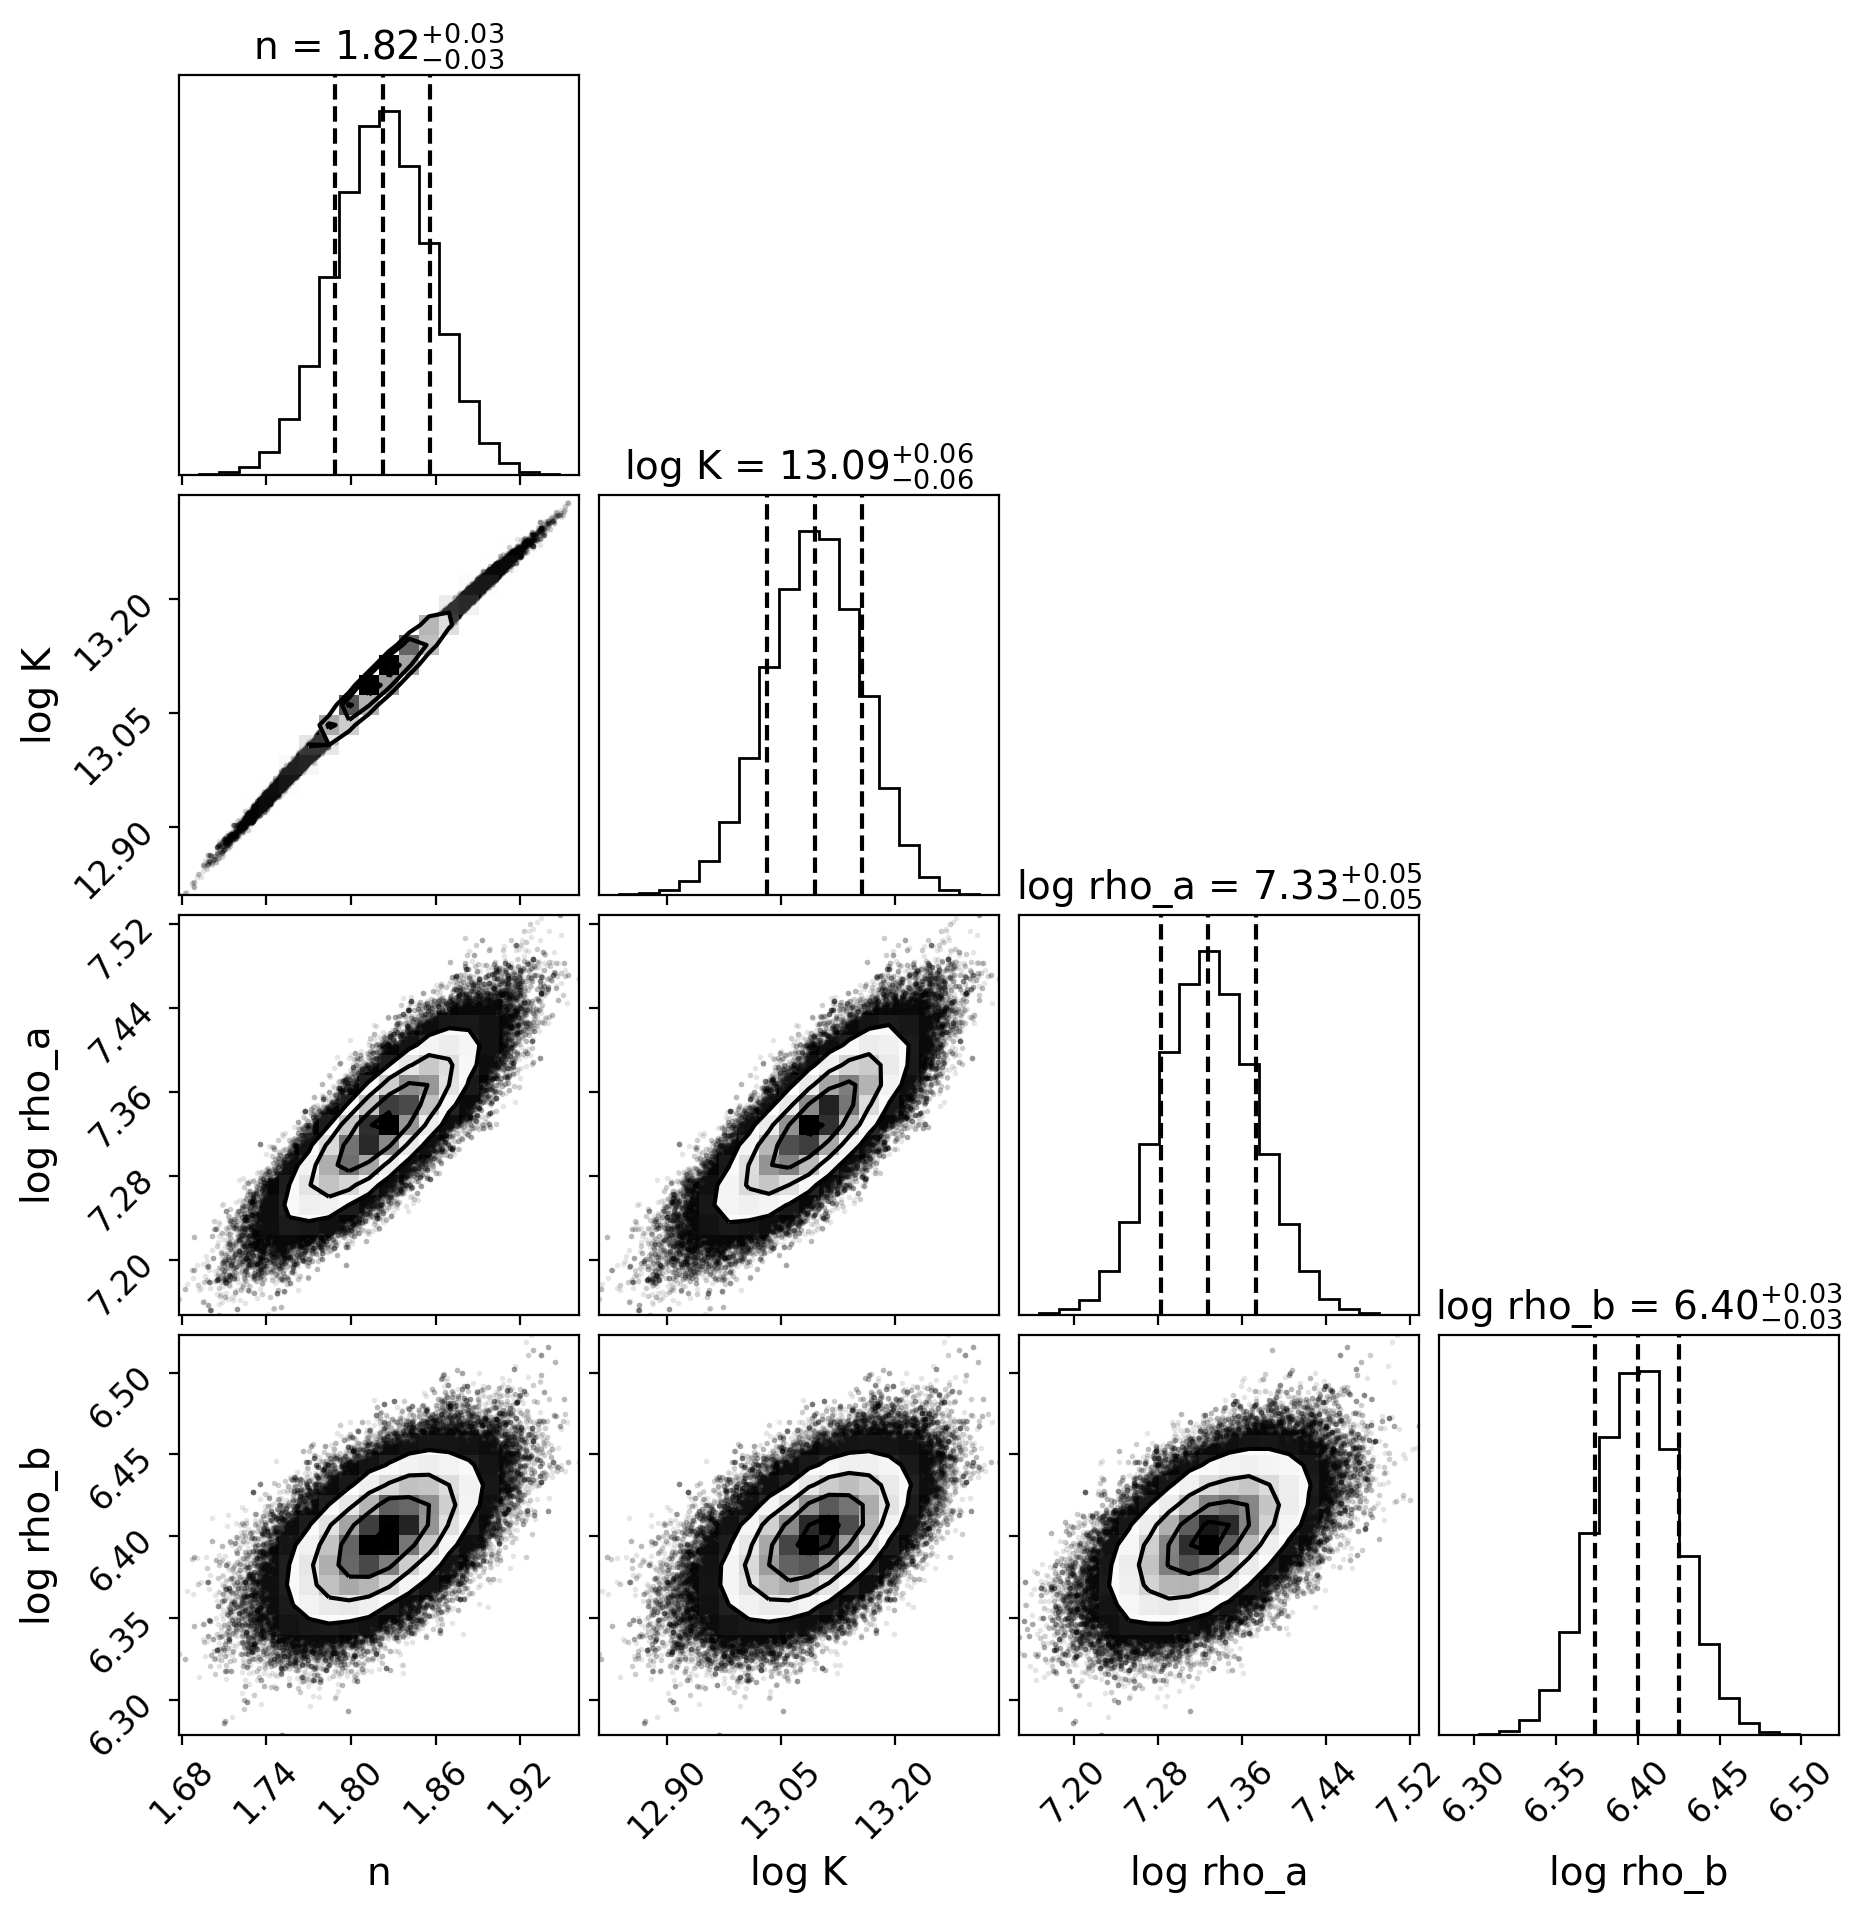

In [21]:
import corner

fig = corner.corner(
    flat_samples, labels=["n", "log K", "log rho_a", "log rho_b"],
    quantiles=[0.16,0.5,0.84], #these numbers here does not change the title, only the place where the vertical lines are placed. The numbers in the title always refer to 68% confidence interval
    show_titles=True,
    title_kwargs={"fontsize": 14}, label_kwargs={"fontsize": 14}
);

for ax in fig.get_axes():
      #ax.tick_params(axis='both', which='major', labelsize=14)
      #ax.tick_params(axis='both', which='minor', labelsize=12)    
      ax.tick_params(axis='both', labelsize=12)

The corner plot shows all the one and two dimensional projections of the posterior probability distributions of your parameters. This is useful because it quickly demonstrates all of the correlations between parameters.

As one can see, there is a strong correlation between $n$ and $\log K$, while for the other combinations it is weaker. However, an interesting point to analyze is the fact that $\log (\rho_a)$ is more strongly correlated with $n$ and $\log K$ than $\log (\rho_b)$. $\log (\rho_a) > \log (\rho_b)$, so it suggests that as the central density increases, the correlations become stronger.

As a final result, let's check the 90% credible intervals of our posterior distributions. We get that the 90% credible interval corresponds from 2-6% of the median and this seems to be a good result.

In [22]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [5, 50, 95])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Solving the problem with the Lane-Emden equation

Solving the stellar structure equations is very time expensive for the MCMC iteration, so one could think about solving the problem by solving the Lane-Emden equation. The point there is that if we consider both the mass and the radius as our variables in the likelihood, we can't take advantage of this equation because we would still need to sample on $\rho_c$. However, as the uncertainties of the measurements are not so high, we could consider either the mass or the radius as having only one value. By doing that, at each iteration we should solve the Lane-Emden equation and find the mass or the radius as a function of each other, without depending on $\rho_c$, by using the equations written in the previous sections. We wouldn't need to sample on $\rho_c$ with this method and this would reduce the time consume of our simulation as well.

Here we will take the mass as the fixed value and the radius as the variable entering in the likelihood as random. So, now our likelihood is reduced to

$$
    \ln\,p(R_{obs} |n, K) =
    -\frac{1}{2} \sum_i^{N_{obs}} \left[
        \frac{(R_{obs_i}-R)^2}{\sigma_{R_i}^2} +
        \ln ( 2 \pi \sigma_{R_i}^2 ).
    \right]
$$

We want again to estimate $n$ and $K$, so we need at least two observations again because we will sample only on the radius. We take the same observations as in the previous case and repeat the same steps, but now with the simplicity of our new assumptions. In the end, the results should be approximately the same, as we assume that the uncertainty on the mass is not high and wouldn't have a strong impact.

## Runge-Kutta and Lane-Emden equation

In [6]:
def dydx1(x, y, z):
    return z

def dydx2(x, y, z, n):
    return -(y**n)-(2/x)*z

In [7]:
# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, z0, h, n_index):

    # Initialise variables
    y = y0
    z = z0
    
    while y>4.0E-4:
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h*dydx1(x0, y, z)
        l1 = h*dydx2(x0, y, z, n_index)
        k2 = h*dydx1(x0 + 0.5 * h, y + 0.5 * k1, z + 0.5 * l1)
        l2 = h*dydx2(x0 + 0.5 * h, y + 0.5 * k1, z + 0.5 * l1, n_index)
        k3 = h*dydx1(x0 + 0.5 * h, y + 0.5 * k2, z + 0.5 * l2)
        l3 = h*dydx2(x0 + 0.5 * h, y + 0.5 * k2, z + 0.5 * l2, n_index)
        k4 = h*dydx1(x0 + h, y + k3, z + l3)
        l4 = h*dydx2(x0 + h, y + k3, z + l3, n_index)
       # print(y,k4,z,l4,n_index)
 
        # Update next value of y and z
        y = y + (1.0/ 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
        z = z + (1.0/ 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)
 
        # Update next value of x
        x0 = x0 + h
        x=x0
        
       # if y<3.0E-6:
            #y = y - (1.0/ 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)
            #z = z - (1.0/ 6.0)*(l1 + 2 * l2 + 2 * l3 + l4)
            #x0 = x0 - h
            #x=x0
            #break
        
    return x,y,z

In [8]:
def LaneEmden(n_index,logK,mass):
    x0 = 1.0E-5           #initial point of integration
    y = 1-(x0**2)/6       #expansion for theta(csi)
    z = -(x0/3)           #expansion for theta'(csi)
    h = 1.0E-3            #step of integration
    csi1, theta, thetaprime = rungeKutta(x0, y, z, h, n_index)   #storing the variables
    
    mass = mass*1.989E33  #conversion from Msun to g
    G = 6.67430E-8   #gravitational constant in cgs units
    K = 10**logK
    
    term1a = (mass[0]/np.abs(thetaprime))**(n_index-1)
    term1b = (mass[1]/np.abs(thetaprime))**(n_index-1)
    #term1c = (mass[2]/np.abs(thetaprime))**(n_index-1)
    term2 = 4*np.pi/(csi1**(n_index+1))
    term3 = (G/(K*(n_index+1)))**n_index
    Ra = ((term1a*term2*term3)**(1/(n_index-3)))/(1.0E5)  #radius in km
    Rb = ((term1b*term2*term3)**(1/(n_index-3)))/(1.0E5)  #radius in km
    #Rc = ((term1b*term2*term3)**(1/(n_index-3)))/(1.0E5)  #radius in km
    
    return Ra,Rb#,Rc

## Data

In [9]:
N_obs=2
xv = np.array([1.0,0.501]) #observed mass in solar masses
yv = np.array([0.0084*696340,0.0136*696340]) #observed radius in km
sigma_y = np.array([0.0002*696340,0.0002*696340])

## Likelihood

In [10]:
def log_likelihood(theta, xv, yv):
    
    n_index, logK = theta
    Ra,Rb = LaneEmden(n_index,logK,xv)
    sigma2 = sigma_y ** 2
    return -0.5 * ((yv[0] - Ra) ** 2 / sigma2[0] + (yv[1] - Rb) ** 2 / sigma2[1] + np.log((sigma2[0]**2)*(sigma2[1]**2)*(2*np.pi)**2))

## Prior and posterior

In [11]:
def log_prior(theta):
    n_index, logK = theta
    if (1.0 < n_index < 3.0 and 11.0 < logK < 15.0):
        return np.log((1/2)*(1/4))
    else:
        return -np.inf #log(0)

In [12]:
def log_posterior(theta, xv, yv):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    else:
        return lp + log_likelihood(theta, xv, yv)

## MCMC settings

In [13]:
import emcee

trial = np.array([1.8,13.2])
pos = trial + 1e-1 * np.random.randn(32, 2)

nwalkers, ndim = pos.shape
nsteps=10000

In [14]:
#Parallel run
from multiprocessing import Pool
import time

with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=(xv, yv), pool=pool)
    start = time.time()
    sampler.run_mcmc(pos, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))

100%|██████████| 10000/10000 [34:30<00:00,  4.83it/s]

Multiprocessing took 2070.4 seconds


## Chain analysis

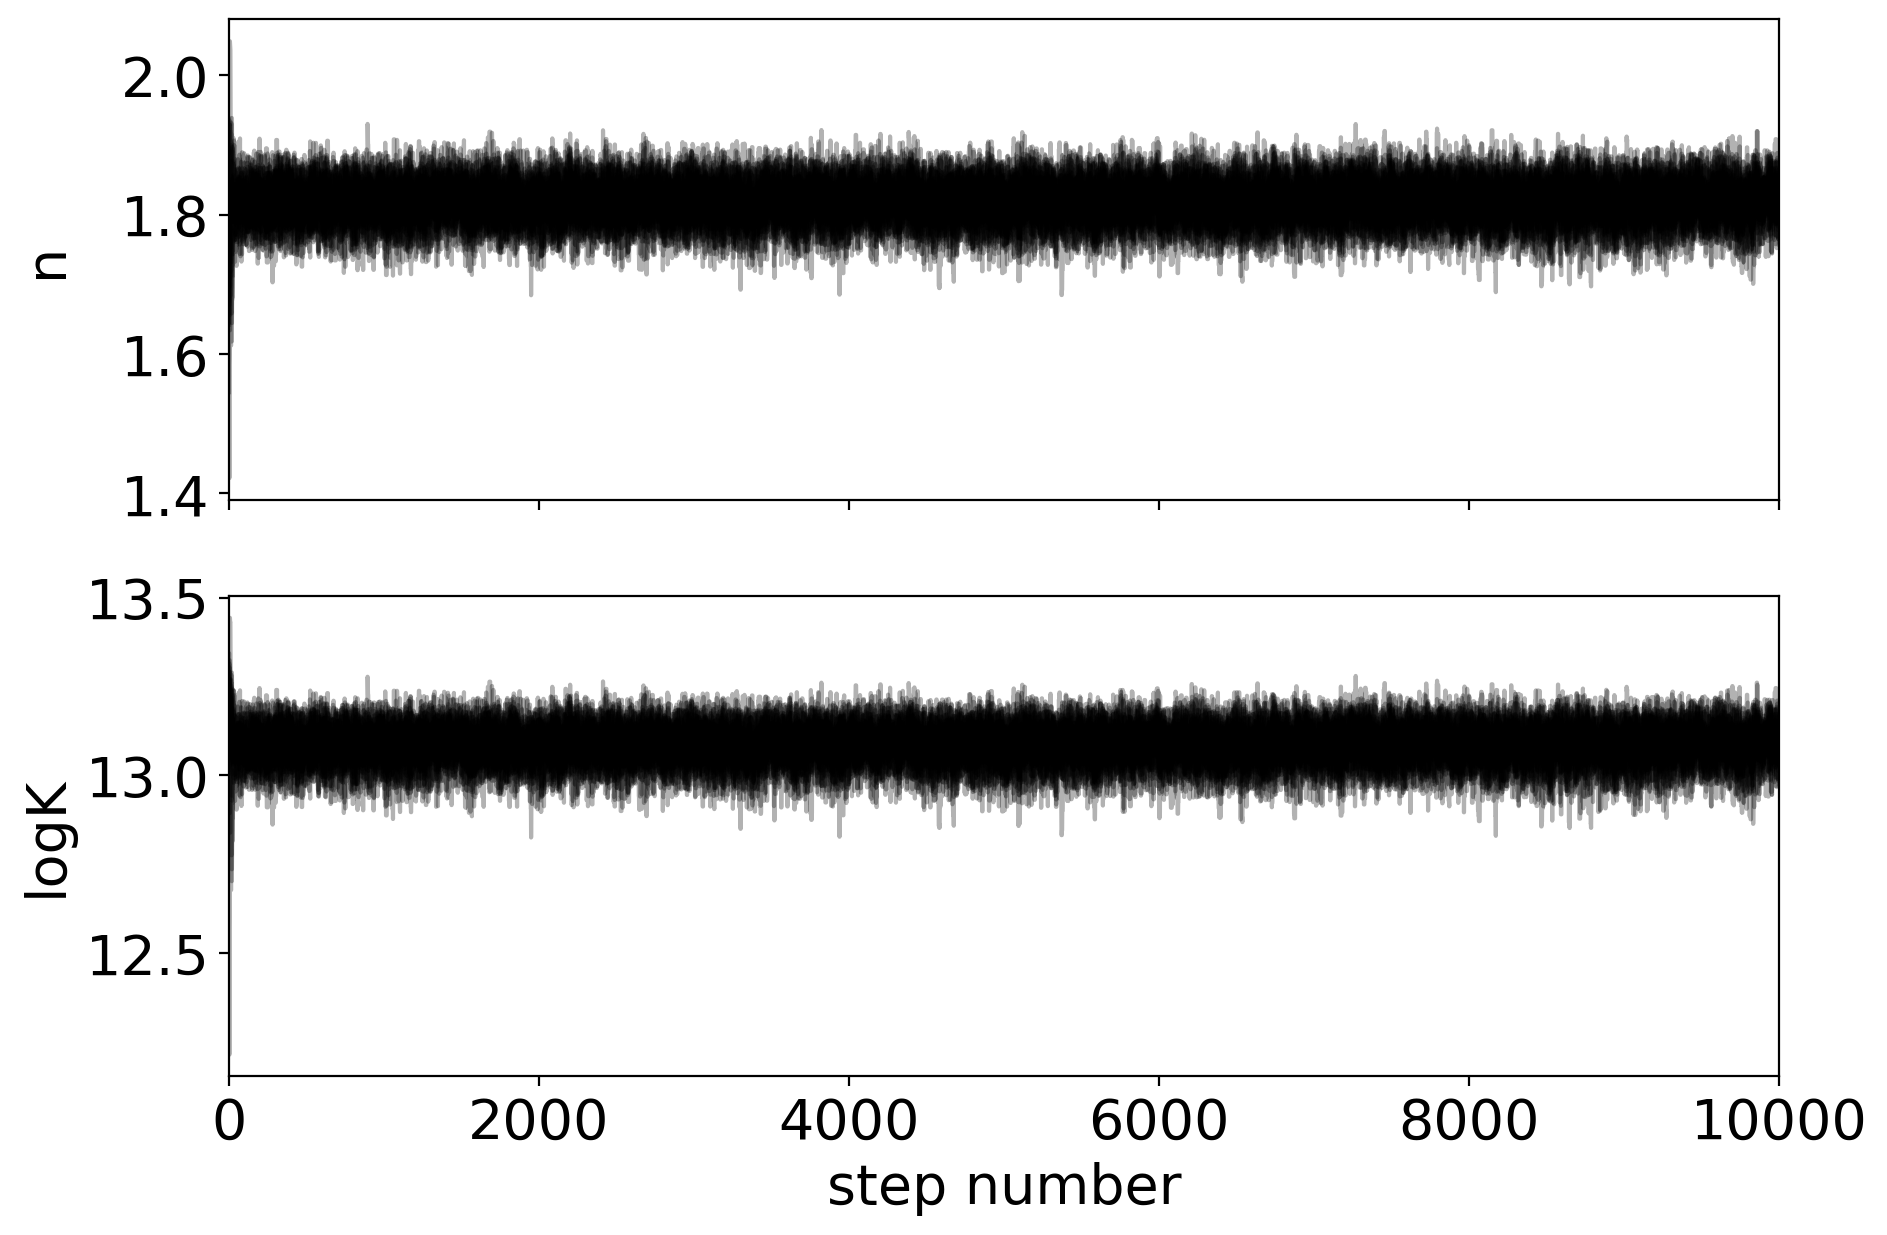

In [15]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["n", "logK"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [16]:
tau = sampler.get_autocorr_time()
print(tau)

[32.30160453 32.22786758]


In [17]:
flat_samples = sampler.get_chain(discard=200, flat=True)
print(flat_samples.shape)

(313600, 2)


In [18]:
from tabulate import tabulate

with open('flatsamplesWD.txt', 'w') as f:
    f.write(tabulate(flat_samples,headers=["n","logK"],floatfmt=".8f"))

## Results

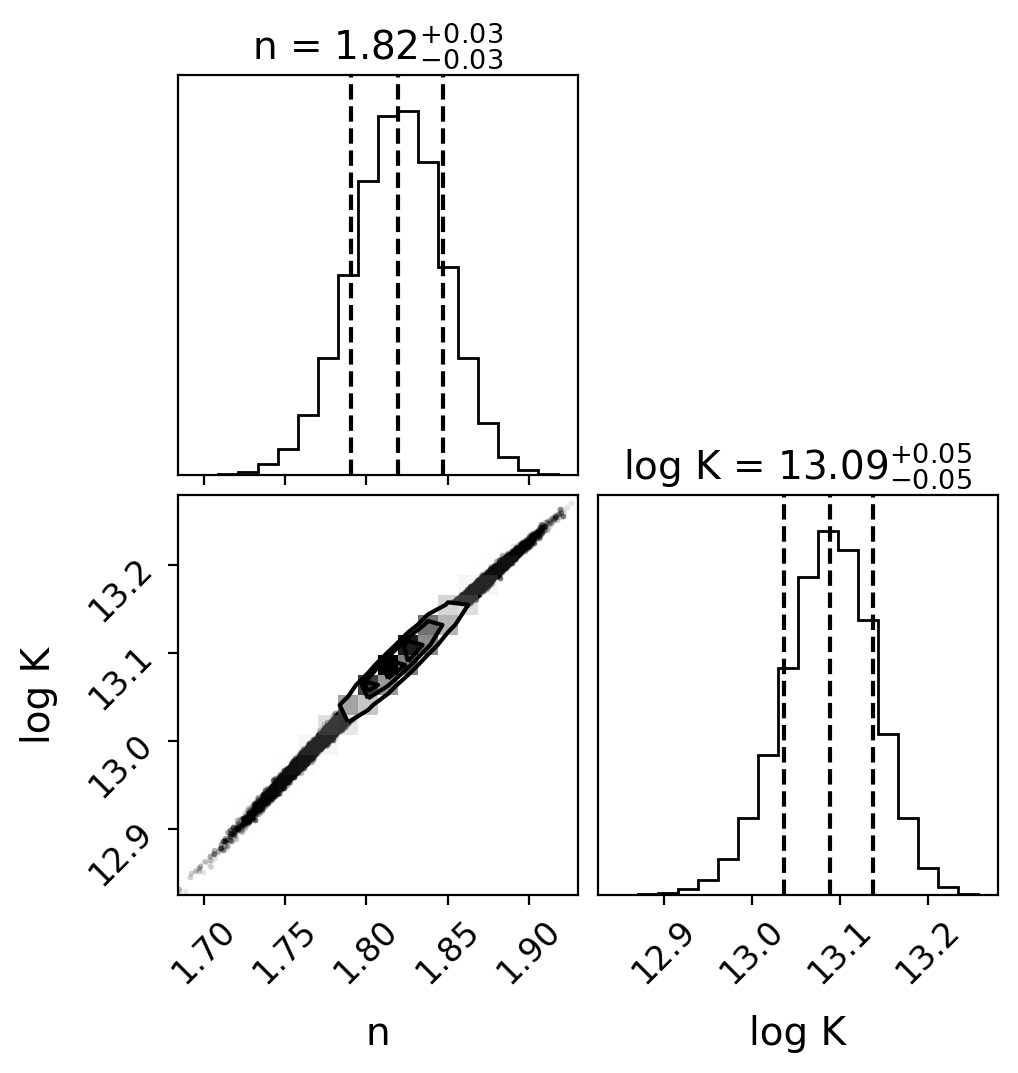

In [19]:
import corner

fig = corner.corner(
    flat_samples, labels=["n", "log K"],
    quantiles=[0.16,0.5,0.84], #these numbers here does not change the title, only the place where the vertical lines are placed. The numbers in the title always refer to 68% confidence interval
    show_titles=True,
    title_kwargs={"fontsize": 14}, label_kwargs={"fontsize": 14}
);

for ax in fig.get_axes():
      #ax.tick_params(axis='both', which='major', labelsize=14)
      #ax.tick_params(axis='both', which='minor', labelsize=12)    
      ax.tick_params(axis='both', labelsize=12)

In [20]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [5, 50, 95])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Comparing our previous results with the new ones, indeed the values for $n$ and $\log K$ agree in a very good level. As expected, not sampling on the mass as well does not produce much different results and it is way less time expensive.